In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import os
try:
  import opendatasets as od
except ModuleNotFoundError:
  %pip install opendatasets
  import opendatasets as od

In [ ]:
## MARIO
path_to_folder = '/content/drive/My Drive/proyecto_TD'  # UPDATE THIS ACCORDING TO WHERE YOU WANT TO SAVE THE FILES!!!!

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

# Change to assignment directory
os.chdir(path_to_folder)

Mounted at /content/drive


# PASO 1: PREPROCESADO


Antes de pasar con el preprocesado, podemos ver las gráficas del final del notebok donde se puede ver una representación gráfica de los datos, mostrando diferentes aspectos de los datos a importar y posteriormente, vectorizar.

In [ ]:
# Cargamos datos

data_df = pd.read_excel('projects.xlsx')
print(len(data_df))

# Creamos el vector raw con las columnas que nos interesan
preproc_df = pd.DataFrame()
preproc_df = data_df[['projectID', 'title', 'summary', 'euroSciVocCode']]
# preproc_df['euroSciVocCode'] = preproc_df['euroSciVocCode']

# Ponemos el ID como los índices
preproc_df.set_index('projectID', inplace=True)

# Juntamos títulos y resúmenes en una columna nueva 'text'
preproc_df['text'] = preproc_df['title'] + ' ' + preproc_df['summary']
preproc_df.drop('summary', axis=1, inplace=True)
preproc_df.drop('title', axis=1, inplace=True)

35378


<ipython-input-5-afa379105e7a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preproc_df['text'] = preproc_df['title'] + ' ' + preproc_df['summary']
<ipython-input-5-afa379105e7a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preproc_df.drop('summary', axis=1, inplace=True)
<ipython-input-5-afa379105e7a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preproc_df.drop('ti

In [ ]:
# Cogemos solo el primer codigo de la lista de codigos si no son NA y si son NA lo ponemos a NA en una columna nueva code
preproc_df['code'] = preproc_df['euroSciVocCode'].apply(lambda x: ast.literal_eval(x)[0] if pd.notna(x) else pd.NA)

# Eliminar las filas que contienen NaN en la columna 'code'
preproc_df = preproc_df.dropna(subset=['code'])

preproc_df.drop('euroSciVocCode', axis=1, inplace=True)


<ipython-input-6-d154f9662da7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preproc_df['code'] = preproc_df['euroSciVocCode'].apply(lambda x: ast.literal_eval(x)[0] if pd.notna(x) else pd.NA)
<ipython-input-6-d154f9662da7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preproc_df.drop('euroSciVocCode', axis=1, inplace=True)


In [ ]:
# Aquí tenemos los códigos primero de cada uno de sus respectivas listas. Luego tenemos que poner el código raíz de cada código
print(preproc_df)

                                                        text  code
projectID                                                         
115843     Ebola Virus: Modern Approaches for developing ...   155
115910     PERtussIS COrrelates of Protection Europe - So...   137
635266     Opening the cycling and walking tracking poten...  1373
637488     Motivating Motor Learning: The Role of Reward,...   159
639226     The Power of Maternal Microbes on Infant Healt...   155
...                                                      ...   ...
101027291  Experiences of youth in natural mentoring rela...   531
101027955  Development of a nanotechnology-based innovati...   155
101028945  Optimizing treatment of cancer patients infect...   225
101032880  Fabrication and Synthesis of Noble Metal Nanop...   441
101038097  Autonomous and Unmanned Vessels in Internation...   547

[32052 rows x 2 columns]


In [ ]:
#Importamos el otro excel para crear el diccionario de los códigos con los códigos raíz
codes_df = pd.read_excel('SciVocCodes.xlsx')
codes_df = codes_df.dropna(subset=['code'])
codes_df['code'] = codes_df['code'].astype(int)
print(len(codes_df))
codes_df.head()


1010


,full_path,title,code,full_code
1,/agricultural sciences/agricultural biotechnol...,plant cloning,1275,/27/79/483/1275
2,/agricultural sciences/agricultural biotechnol...,agricultural genetics,483,/27/79/483
3,/agricultural sciences/agricultural biotechnol...,biomass,481,/27/79/481
4,/agricultural sciences/agricultural biotechnol...,marker assisted selection,487,/27/79/487
5,/agricultural sciences/agricultural biotechnology,agricultural biotechnology,79,/27/79


In [ ]:
# Diccionario de codigos

# Crear el diccionario de cada uno de los códigos con su raíz.
codes_dic = {}

# Iterar sobre las filas del DataFrame
for index, row in codes_df.iterrows():
    codigo = (row['code'])
    secuencia = row['full_code'].split('/')[1]  # Obtener el valor después de la primera barra inclinada
    codes_dic[codigo] = int(secuencia)

# Mostrar el diccionario resultante
print(codes_dic)
print(np.unique(np.array(list(codes_dic.values()))))

{1275: 27, 483: 27, 481: 27, 487: 27, 79: 27, 1281: 27, 491: 27, 493: 27, 8144402: 27, 72257146: 27, 1831: 27, 30833628: 27, 84709101: 27, 44780297: 27, 1287: 27, 97328111: 27, 1289: 27, 69103681: 27, 497: 27, 499: 27, 1833: 27, 12266820: 27, 1279: 27, 30021: 27, 489: 27, 1753: 27, 1283: 27, 495: 27, 81: 27, 505: 27, 503: 27, 1291: 27, 507: 27, 501: 27, 83: 27, 85: 27, 87: 27, 27: 27, 415: 25, 411: 25, 13858428: 25, 79070535: 25, 1157: 25, 9727961: 25, 81684188: 25, 65: 25, 1749: 25, 1267: 25, 479: 25, 477: 25, 1747: 25, 1745: 25, 1255: 25, 1253: 25, 1257: 25, 473: 25, 1263: 25, 1259: 25, 1265: 25, 1261: 25, 475: 25, 1269: 25, 94443578: 25, 21046462: 25, 1187: 25, 33625299: 25, 56936995: 25, 24482249: 25, 84897392: 25, 77: 25, 1161: 25, 87041214: 25, 1703: 25, 1825: 25, 1707: 25, 1705: 25, 1209: 25, 451: 25, 1213: 25, 1203: 25, 1207: 25, 1205: 25, 449: 25, 1211: 25, 1271: 25, 457: 25, 1217: 25, 1729: 25, 1229: 25, 1233: 25, 1231: 25, 1227: 25, 459: 25, 66357197: 25, 44113014: 25, 48389

In [ ]:
#preproc_df['code'] = preproc_df[['euroSciVocCode']][0].replace(codes_dic)
for i in range(preproc_df.shape[0]):
  codigo = preproc_df['code'].iloc[i]
  value = codes_dic[codigo]

  preproc_df['code'].iloc[i] = value


In [ ]:
print(preproc_df)

                                                        text code
projectID                                                        
115843     Ebola Virus: Modern Approaches for developing ...   21
115910     PERtussIS COrrelates of Protection Europe - So...   21
635266     Opening the cycling and walking tracking poten...   29
637488     Motivating Motor Learning: The Role of Reward,...   21
639226     The Power of Maternal Microbes on Infant Healt...   21
...                                                      ...  ...
101027291  Experiences of youth in natural mentoring rela...   29
101027955  Development of a nanotechnology-based innovati...   21
101028945  Optimizing treatment of cancer patients infect...   21
101032880  Fabrication and Synthesis of Noble Metal Nanop...   25
101038097  Autonomous and Unmanned Vessels in Internation...   29

[32052 rows x 2 columns]


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

import re
try:
  import contractions
except ModuleNotFoundError:
  %pip install contractions
  import contractions


def wrangle_text(text):

    soup = BeautifulSoup(text, 'lxml')

    url_pattern = r'https://\S+|www\.\S+'

    text2 = re.sub(url_pattern, '', soup.text)

    text_expanded = contractions.fix(text2)

    return text_expanded

# Función donde se realiza todo el preprocesado de los textos

def prepare_data(text):

    wrangled_text = wrangle_text(text)

    text_tokens = wordpunct_tokenize(wrangled_text)

    text_tokens_filtered = [token.lower() for token in text_tokens if token.isalnum()]

    stemmer = SnowballStemmer('english')
    wnl = WordNetLemmatizer()

    lemmatized_text = [wnl.lemmatize(el) for el in text_tokens_filtered]

    clean_text= [lemma for lemma in lemmatized_text if lemma not in stopwords_en]

    return clean_text



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.1 MB/s eta 0:00:00


In [ ]:
preproc_df['clean_text'] = preproc_df['text'].apply(prepare_data)
corpus = list(preproc_df['clean_text'])

print(('Number of documents in corpus: '+str(len(corpus))))
print(('\n============= First text ============='))
print(corpus[0])

<ipython-input-12-6e654c3df423>:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Number of documents in corpus: 32052

============= First text =============
['ebola', 'virus', 'modern', 'approach', 'developing', 'bedside', 'rapid', 'diagnostics', 'sofia', 'ref', '115843', 'current', 'ebola', 'virus', 'disease', 'evd', 'outbreak', 'ha', 'caused', '5000', 'death', 'within', 'month', 'west', 'africa', 'guinea', 'sierra', 'leone', 'liberia', 'severely', 'affected', 'country', 'including', 'numerous', 'healthcare', 'worker', 'serious', 'public', 'health', 'crisis', 'international', 'concern', 'number', 'case', 'still', 'increasing', '11', 'month', 'first', 'case', 'wa', 'described', 'december', '2013', 'mid', 'november', '2014', 'approximately', '15000', 'individual', 'infected', 'epidemic', 'still', 'control', 'direct', 'effect', 'outbreak', 'include', 'disruption', 'standard', 'medical', 'care', 'insecurity', 'social', 'disruption', 'country', 'already', 'struggling', 'recover', 'decade', 'war', 'one', 'important', 'key', 'action', 'limit', 'stop', 'spread', 'deadly'

# PASO 2: REPRESENTACIÓN VECTORIAL

### Gensim Dictionary


In [ ]:
from gensim.models.phrases import Phrases

phrase_model = Phrases(corpus, min_count=5, threshold=50)

print(('\n============= First text in corpus ============='))
print(corpus[0])
corpus = [el for el in phrase_model[corpus]] # We populate corpus again
print('\n============= First text after N-gram replacement =============')
print(corpus[0])


============= First text in corpus =============
['ebola', 'virus', 'modern', 'approach', 'developing', 'bedside', 'rapid', 'diagnostics', 'sofia', 'ref', '115843', 'current', 'ebola', 'virus', 'disease', 'evd', 'outbreak', 'ha', 'caused', '5000', 'death', 'within', 'month', 'west', 'africa', 'guinea', 'sierra', 'leone', 'liberia', 'severely', 'affected', 'country', 'including', 'numerous', 'healthcare', 'worker', 'serious', 'public', 'health', 'crisis', 'international', 'concern', 'number', 'case', 'still', 'increasing', '11', 'month', 'first', 'case', 'wa', 'described', 'december', '2013', 'mid', 'november', '2014', 'approximately', '15000', 'individual', 'infected', 'epidemic', 'still', 'control', 'direct', 'effect', 'outbreak', 'include', 'disruption', 'standard', 'medical', 'care', 'insecurity', 'social', 'disruption', 'country', 'already', 'struggling', 'recover', 'decade', 'war', 'one', 'important', 'key', 'action', 'limit', 'stop', 'spread', 'deadly', 'disease', 'identify', 'i

In [ ]:
from gensim.corpora import Dictionary

# Create dictionary of tokens
D = Dictionary(corpus)
n_tokens = len(D)

print('The positive dictionary contains', n_tokens, 'terms')
print('First terms in the dictionary:')
for n in range(10):
    print(str(n), ':', D[n])

The positive dictionary contains 120392 terms
First terms in the dictionary:
0 : 11
1 : 115843
2 : 15000
3 : 2013
4 : 2014
5 : 5000
6 : action
7 : affected
8 : africa
9 : african


In [ ]:
no_below = 4 #Minimum number of documents to keep a term in the dictionary
no_above = .80 #Maximum proportion of documents in which a term can appear to be kept in the dictionary

D.filter_extremes(no_below=no_below,no_above=no_above)
n_tokens = len(D)

print('The dictionary contains', n_tokens, 'terms')

The dictionary contains 35755 terms


In [ ]:
# Nuevo corpus habiendo filtrado los extremos
corpus_def = []
for sent in corpus:
  aux = [token for token in sent if token in D.token2id.keys()]
  corpus_def.append(aux)

preproc_df['clean_text'] = corpus_def


In [ ]:
for i in range(10):
    if i < len(corpus):
        tamaño_lista_i = len(corpus[i])
        print(f"El número de elementos en la lista {i + 1} es: {tamaño_lista_i}")

print('\n')
for i in range(10):
    if i < len(corpus_def):
        tamaño_lista_i = len(corpus_def[i])
        print(f"El número de elementos en la lista {i + 1} es: {tamaño_lista_i}")


El número de elementos en la lista 1 es: 187
El número de elementos en la lista 2 es: 168
El número de elementos en la lista 3 es: 145
El número de elementos en la lista 4 es: 179
El número de elementos en la lista 5 es: 192
El número de elementos en la lista 6 es: 181
El número de elementos en la lista 7 es: 172
El número de elementos en la lista 8 es: 188
El número de elementos en la lista 9 es: 133
El número de elementos en la lista 10 es: 191


El número de elementos en la lista 1 es: 185
El número de elementos en la lista 2 es: 149
El número de elementos en la lista 3 es: 132
El número de elementos en la lista 4 es: 170
El número de elementos en la lista 5 es: 192
El número de elementos en la lista 6 es: 176
El número de elementos en la lista 7 es: 171
El número de elementos en la lista 8 es: 182
El número de elementos en la lista 9 es: 131
El número de elementos en la lista 10 es: 185


### Bag of Word (BoW)  

In [ ]:
text_bow = [D.doc2bow(doc) for doc in corpus_def]

n_text = 1000
print('============= Text (lemmas) =============')
print(' '.join(corpus_def[n_text]))

print('\n============= Sparse vector representation =============')
print(text_bow[n_text])

print('\n============= Word counts for the text =============')
print(list(map(lambda x: (D[x[0]], x[1]), text_bow[n_text])))

============= Text (lemmas) =============
early_detection progress monitoring prediction corrosion aeronautic al_alloy calibrated ultrasonic corrosion sensor application corrosion dynamic process propagation rate remains difficult predict varies depending type corrosion occurring exfoliation corrosion fatigue scc currently presence corrosion damage may detected mean ndt however corrosion initiation mechanism_behind defect cannot distinguished currently used method consequence early_detection corrosion done corrective_action performed become relevant crack loss thickness therefore aircraft industry need sensor able_detect corrosion initiation propagation combined predictive model allow forecasting damage progress paint degraded main_objective cross design develop validate application ultrasonic corrosion sensor ucs combining passive acoustic emission active pulse echo ultrasonic testing type corrosion monitoring enabling real_time detection early_stage localized corrosion well monitorin

## TFIDF

In [ ]:
from gensim.models import TfidfModel

tfidf = TfidfModel(text_bow)

In [ ]:
texts_tfidf = tfidf[text_bow]

n_text = 1000
print('============= TFIDF representation for the project =============')
print(texts_tfidf[n_text])


============= TFIDF representation for the project =============
[(33, 0.043328051103057146), (53, 0.01441419349678239), (85, 0.01576501768412376), (94, 0.02291140925682527), (99, 0.023838847025297673), (103, 0.06614470523935101), (118, 0.022320037493046244), (135, 0.02208443366210318), (138, 0.06900031911775532), (142, 0.03365179626737293), (149, 0.026478494896698512), (151, 0.016333003867545794), (158, 0.020585287498793944), (180, 0.011971162501669167), (181, 0.009926831253965608), (194, 0.018522813779926386), (199, 0.015486727532362042), (218, 0.025224870947698583), (220, 0.02564953263972751), (223, 0.017147711617460922), (248, 0.017242814362426417), (259, 0.011654538339842611), (281, 0.021747804425264517), (287, 0.027216112181709447), (296, 0.02421286389206908), (316, 0.004635298142157093), (319, 0.01314964902513003), (323, 0.00893554387782747), (336, 0.014745174881779729), (337, 0.015675365899120584), (343, 0.061720334957423476), (352, 0.01211757461613061), (356, 0.028373995301090

In [ ]:
## Convert vector representation into NumPy arrays

from gensim.matutils import corpus2dense, corpus2csc

n_tokens = len(D)
num_docs = len(texts_tfidf)

# Convert TFIDF representacion
# Usaremos la densa al no tener un corpus muy extenso
corpus_tfidf = corpus2dense(texts_tfidf, num_terms=n_tokens, num_docs=num_docs).T



In [ ]:
# cambiamos los valores del codigo por valores del 0-5 para poder hacer la clasificación luego
mapping = {21: 0, 23: 1, 25: 2, 27: 3, 29: 4, 31: 5}

y = preproc_df['code']

# Reemplazar los valores en la columna 'code' usando el método replace
y = y.replace(mapping)

y

projectID
115843       0
115910       0
635266       4
637488       0
639226       0
            ..
101027291    4
101027955    0
101028945    0
101032880    2
101038097    4
Name: code, Length: 32052, dtype: int64

In [ ]:
###### CLASIFICACIÓN TFIDF #######

## RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

# Separamos en test y train
X_train, X_test, y_train, y_test = train_test_split(corpus_tfidf, y, test_size=0.3, random_state=42)

# Definimos el GirdSearch
param_grid_rf = {
    'n_estimators': [200],
    'max_depth': [None],
    'min_samples_split': [5],
}

rf_classifier = RandomForestClassifier()

grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Mejores parámetros del gridsearch
best_params_rf = grid_search_rf.best_params_

# Entrenamiento
best_rf_classifier = RandomForestClassifier(**best_params_rf)
best_rf_classifier.fit(X_train, y_train)

# Evalución con el test
rf_predictions = grid_search_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Best Random Forest Parameters: {best_params_rf}")
print(f"Random Forest Accuracy on Test Data: {rf_accuracy:.4f}")

Tras haber hecho un grdisearch con los siguientes parámetros:
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    
Se ha determinado que los mejores parámetros son:
Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}, con una precisión de **0.6151**
Por lo que de ahora en adelante, se usarán estos hiperparámetros


## Word2vec

In [ ]:
# Create the Word2Vec model with skip-gram architecture

from gensim.models import Word2Vec

model_w2v = Word2Vec(
    sentences=corpus,
    vector_size=200,       # Size of the word vectors. 200 for it is a great corpus and it is not extremely computationally demmanding
    window=5,              # Maximum distance between the current and predicted word within a sentence
    sg=1,                  # 1 for skip-gram, 0 for CBOW
    min_count=10,          # Ignores all words with a total frequency lower than this
    seed=42                # Seed for reproducibility
)

# Training the Word2Vec model
model_w2v.train(corpus, total_examples=model_w2v.corpus_count, epochs=30)


(165237659, 174054630)

In [ ]:
print('\n============= Word2Vec vocabulary =============')
words = list(model_w2v.wv.key_to_index)
print(words[0:50])
print('\n============= Embedding of the first word =============')
print(model_w2v.wv[words[0]])


============= Word2Vec vocabulary =============
['project', 'new', 'system', 'research', 'technology', 'based', 'ha', 'data', 'cell', 'development', 'high', 'study', 'energy', 'process', 'market', 'model', 'approach', 'aim', 'use', 'european', 'time', 'material', 'develop', 'solution', 'novel', 'application', 'cost', 'also', 'using', 'network', 'innovation', '1', 'impact', '2', 'provide', 'well', 'field', 'analysis', 'design', 'innovative', 'tool', 'potential', 'human', 'method', 'europe', 'service', 'first', 'level', 'one', 'different']

============= Embedding of the first word =============
[ 2.50080060e-02  1.51570678e-01 -3.82343493e-02  2.52463430e-01
  4.06973958e-01  1.11070141e-01 -6.74316362e-02 -4.09243070e-02
  1.50677040e-01  1.09702989e-01 -7.59584680e-02  8.42489302e-02
 -1.52264796e-02  2.06697397e-02  5.82228303e-02 -1.48976207e-01
 -8.87114257e-02 -1.67274028e-02 -4.18002531e-02  5.20052798e-02
 -4.21972871e-02  8.76624957e-02 -5.49187362e-02  1.29891574e-01
 -1.4567

In [ ]:
from gensim.models import KeyedVectors

# Store just the words + their trained embeddings.
word_vectors = model_w2v.wv
word_vectors.save("model_w2v_imbd_sampling03.wordvectors")

# Load back with memory-mapping = read-only, shared across processes.
wv = KeyedVectors.load("model_w2v_imbd_sampling03.wordvectors", mmap='r')

In [ ]:
# ver palabras más similares
wv.most_similar(positive="detection")

[('detect', 0.6492388844490051),
 ('detecting', 0.6183367371559143),
 ('detected', 0.5417566895484924),
 ('ultrasensitive', 0.5281531810760498),
 ('diagnosis', 0.5139119029045105),
 ('identification', 0.5059312582015991),
 ('monitoring', 0.5036414861679077),
 ('sensitivity', 0.49715879559516907),
 ('detects', 0.4942739009857178),
 ('quantification', 0.492845356464386)]

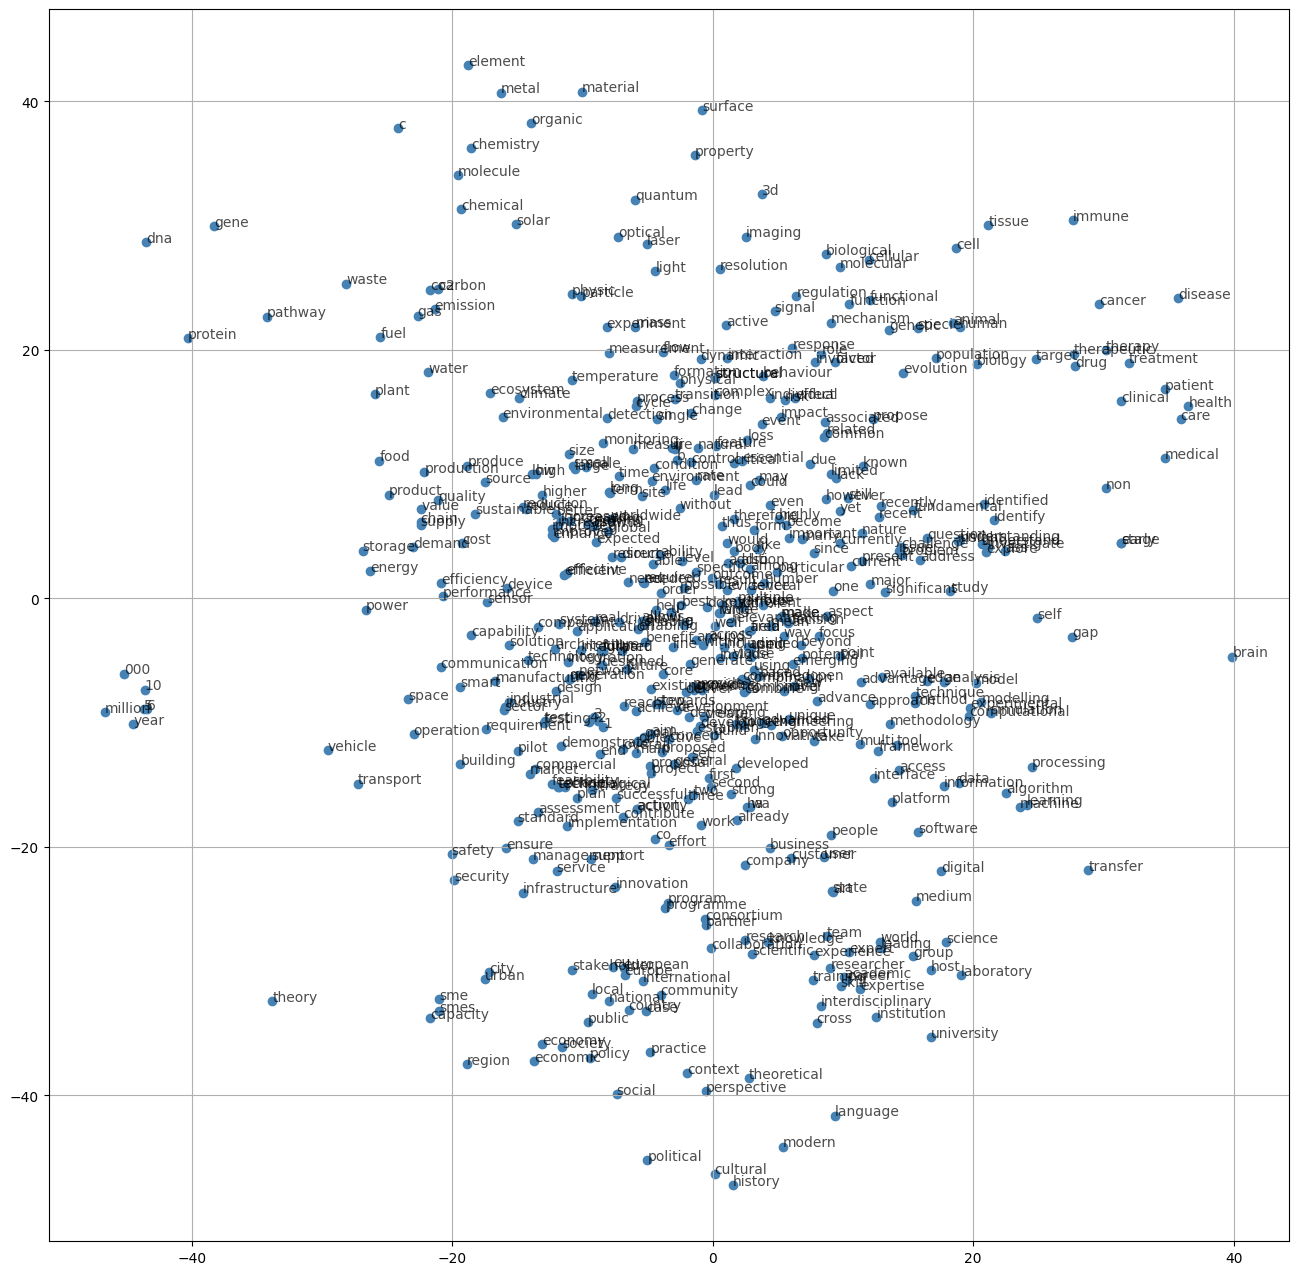

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(init='random')
embed_tsne = tsne.fit_transform(wv.vectors)

# We plot only 500 embeddings
fig, ax = plt.subplots(figsize=(16, 16))
for idx, word in enumerate((list(wv.key_to_index.keys())[:500])):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(word, (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)

plt.grid()

In [ ]:
import gc
del embed_tsne
gc.collect()

48

In [ ]:
def get_vocabulary_coverage(word_vectors, gensim_dict):
    """
    Calculate vocabulary coverage of the Word2Vec model on a Gensim dictionary.

    Parameters:
    - word_vectors: A Gensim KeyedVectors object.
    - gensim_dict: The Gensim Dictionary associated with the reviews.

    Returns:
    - Vocabulary coverage as a percentage.
    """
    total_words = len(gensim_dict)
    in_vocab_count = 0

    for word, _ in gensim_dict.items():
        if word in word_vectors:
            in_vocab_count += 1

    coverage = (in_vocab_count / total_words) * 100
    return coverage


# Calculamos el porcentaje de cobertura del diccionario en Word2Vec
coverage = get_vocabulary_coverage(word_vectors, D)

print(f"porcentaje de cobertura del vocabulario en Word2Vec: {coverage:.2f}%")


porcentaje de cobertura del vocabulario en Word2Vec: 57.41%


In [ ]:
import numpy as np
from gensim.models import KeyedVectors

# Definimos la funcion para calcular el embedding de cada texto como una media de los embeddings de las palabras de cada texto
def get_text_vector(word_vectors, text_tokens):

    # Filtramos primero las palabras de fuera del vocabulario (OOV)
    valid_tokens = [token for token in text_tokens if token in word_vectors]

    # Si los tokens no son validos se devuelve un vector de 0
    if not valid_tokens:
        return np.zeros(word_vectors.vector_size)

    # Se calcula el vector de embeddings medio
    text_vector = np.mean([word_vectors[token] for token in valid_tokens], axis=0)
    return text_vector


text_vectors = [get_text_vector(word_vectors, text_tokens) for text_tokens in corpus]

# Guardamos todos los textos como una matriz
text_matrix = np.vstack(text_vectors)


In [ ]:
###### CLASIFICACION WORD2VEC ######
## RANDOM FOREST
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    text_matrix, y, test_size=0.3, random_state=42
)

# Random Forest Classifier
rf_params = {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
rf_classifier = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_classifier, rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)

# Obtener las mejores configuraciones del GridSearchCV
best_rf_params = rf_grid_search.best_params_

# Evaluar el rendimiento del clasificador Random Forest en el conjunto de prueba
rf_predictions = rf_grid_search.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Best Random Forest Parameters: {best_rf_params}")
print(f"Random Forest Accuracy on Test Data: {rf_accuracy:.4f}")


Tras haber hecho un grdisearch con los siguientes parámetros:
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    
Se ha determinado que los mejores parámetros son:
Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}, con una precisión de **0.6408**
Por lo que de ahora en adelante, se usarán estos hiperparámetros

## BERT (Hugging Face)

In [ ]:
# Install necessary packages
import importlib, os

necessary_packages = ['transformers[sentencepiece,torch]', 'datasets', 'colored', 'wikipedia', 'evaluate', 'nltk', 'rouge_score', 'bertviz']
def import_missing(packages):
  for p in packages:
    try:
      mod = importlib.import_module(p)
      print(f"Package {p} already installed!")
      packages.remove(p)
    except ModuleNotFoundError:
      print(f"Installing package {p}")
      with open("requirements.txt", 'w') as f:
        f.write("\n".join(str(i) for i in packages))
  if os.path.isfile("requirements.txt"):
    %pip install --quiet -r "requirements.txt"

import_missing(necessary_packages)
#%pip install accelerate -U --


Installing package transformers[sentencepiece,torch]
Installing package datasets
Installing package colored
Installing package wikipedia
Installing package evaluate
Package nltk already installed!
Installing package bertviz
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Common imports
import os
import numpy as np
import pandas as pd
from colored import Fore, Back, Style
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import scipy
from colored import fore, back, style
import torch
import json
import random
from collections import defaultdict
import nltk
nltk.download("punkt")

# Figures plotted inside the notebook
%matplotlib inline
# High quality figures
%config InlineBackend.figure_format = 'retina'
# Figures style
plt.style.use('seaborn-whitegrid')
sns.set_style("darkgrid")
sns.color_palette("deep")
# Figues size
plt.rcParams['figure.figsize'] = [8, 6]

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore',module='gradio')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-14-d7e391b9439b>:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
# Elegimos un modelo en el hub para clasificación. En este caso bert-base-uncased

checkpoint_name = "bert-base-uncased"

In [ ]:
pip install datasets


In [ ]:
from datasets import Dataset, DatasetDict
from transformers import DistilBertTokenizer

In [ ]:
preproc_df_bert = preproc_df
preproc_df_bert = preproc_df_bert.drop('clean_text', axis=1)

# Mapear los valores existentes a los nuevos valores
mapping = {21: 0, 23: 1, 25: 2, 27: 3, 29: 4, 31: 5}

# Reemplazar los valores en la columna 'code' usando el método replace
preproc_df_bert['code'] = preproc_df_bert['code'].replace(mapping)

# Imprimir el DataFrame actualizado
print(preproc_df_bert)

dataset = Dataset.from_pandas(preproc_df_bert)
preproc_dic= DatasetDict({'train': dataset})

from sklearn.model_selection import train_test_split


# Dividir la lista en entrenamiento, validación y prueba
preproc_dic = preproc_dic["train"].train_test_split(test_size=0.25, seed=42)
preproc_dic_temp = preproc_dic["test"].train_test_split(test_size=0.5, seed=42)

preproc_dic = DatasetDict({
    "train": preproc_dic["train"].shuffle(seed=42),
    "test": preproc_dic_temp["train"].shuffle(seed=42),
    "val": preproc_dic_temp["test"].shuffle(seed=42),
})

preproc_dic


                                                        text  code
projectID                                                         
115843     Ebola Virus: Modern Approaches for developing ...     0
115910     PERtussIS COrrelates of Protection Europe - So...     0
635266     Opening the cycling and walking tracking poten...     4
637488     Motivating Motor Learning: The Role of Reward,...     0
639226     The Power of Maternal Microbes on Infant Healt...     0
...                                                      ...   ...
101027291  Experiences of youth in natural mentoring rela...     4
101027955  Development of a nanotechnology-based innovati...     0
101028945  Optimizing treatment of cancer patients infect...     0
101032880  Fabrication and Synthesis of Noble Metal Nanop...     2
101038097  Autonomous and Unmanned Vessels in Internation...     4

[32052 rows x 2 columns]


DatasetDict({
    train: Dataset({
        features: ['text', 'code', 'projectID'],
        num_rows: 24039
    })
    test: Dataset({
        features: ['text', 'code', 'projectID'],
        num_rows: 4006
    })
    val: Dataset({
        features: ['text', 'code', 'projectID'],
        num_rows: 4007
    })
})

In [ ]:
preproc_traindata=preproc_dic["train"]
preproc_traindata.features

preproc_testdata=preproc_dic["test"]
preproc_testdata.features

{'text': Value(dtype='string', id=None),
 'code': Value(dtype='int64', id=None),
 'projectID': Value(dtype='int64', id=None)}

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained(checkpoint_name)

def tokenize_function(example):
  return tokenizer(example["text"], truncation=True)

tokenized_preproc_dic = preproc_dic.map(tokenize_function, batched=True)
tokenized_preproc_dic

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/24039 [00:00<?, ? examples/s]

Map:   0%|          | 0/4006 [00:00<?, ? examples/s]

Map:   0%|          | 0/4007 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'code', 'projectID', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 24039
    })
    test: Dataset({
        features: ['text', 'code', 'projectID', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4006
    })
    val: Dataset({
        features: ['text', 'code', 'projectID', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4007
    })
})

In [ ]:
# Remove text features
tokenized_preproc_dic = tokenized_preproc_dic.remove_columns(["text"])
tokenized_preproc_dic = tokenized_preproc_dic.remove_columns(["projectID"])
# Rename "label" to "labels" as expected by the model
tokenized_preproc_dic = tokenized_preproc_dic.rename_column("code", "labels")
tokenized_preproc_dic


DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 24039
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4006
    })
    val: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4007
    })
})

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

### Fine-Tuning


In [ ]:
#pip install transformers[torch]

In [ ]:
#pip install accelerate -U

In [ ]:
#pip install transformers torch -U


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)
from transformers import Trainer
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
from transformers import EarlyStoppingCallback


model = AutoModelForSequenceClassification.from_pretrained(checkpoint_name, num_labels=6)

training_args = TrainingArguments(
    output_dir=f"{checkpoint_name}-finetuned",
    per_device_train_batch_size=16,                                             # The batch size per GPU/TPU core/CPU for training
    per_device_eval_batch_size=16,                                              # The batch size per GPU/TPU core/CPU for validation
    num_train_epochs=5,                                                         # Total number of training epochs to perform
    evaluation_strategy="epoch",                                                # During training evaluation strategy: here, evaluation is done at the end of each epoch
    logging_strategy="epoch",                                                   # Logging strategy to adopt during training: here, logging is done at the end of each epoch
    save_strategy="epoch",                                                      # Checkpoint save strategy to adopt during training: here, save is done at the end of each epoch
    learning_rate=2e-5,                                                         # The initial learning rate for AdamW optimizer
    load_best_model_at_end=True,                                                # Whether or not to load the best model found during training at the end of training: here, yes
    metric_for_best_model='accuracy',                                           # Metric to use to compare two different models.
    seed=42,                                                                    # Random seed that will be set at the beginning of training
)

def compute_metrics(eval_preds):
    pred, labels = eval_preds
    pred = np.argmax(pred, axis=-1)
    accuracy = accuracy_score(y_true=labels, y_pred=pred)

    return {"accuracy": accuracy}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_preproc_dic['train'],
    eval_dataset=tokenized_preproc_dic['val'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=2, early_stopping_threshold=0.0)]
)

trainer.train()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,0.895600,0.798936,0.692538
2,0.676700,0.744224,0.723234
3,0.532100,0.781121,0.718243
4,0.400000,0.860468,0.716746


TrainOutput(global_step=6012, training_loss=0.626111678417254, metrics={'train_runtime': 8762.5283, 'train_samples_per_second': 13.717, 'train_steps_per_second': 0.858, 'total_flos': 2.2128811150375188e+16, 'train_loss': 0.626111678417254, 'epoch': 4.0})

In [ ]:
results = trainer.evaluate()   # just gets evaluation metrics
print(results)


{'eval_loss': 0.744223952293396, 'eval_accuracy': 0.723234339905166, 'eval_runtime': 123.1002, 'eval_samples_per_second': 32.551, 'eval_steps_per_second': 2.039, 'epoch': 4.0}


### Make Predictions with the model

In [ ]:
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)
from transformers import Trainer
from transformers import TrainingArguments
from transformers import AutoModelForSequenceClassification
from transformers import EarlyStoppingCallback


# Load trained model
checkpoint = 6012
model_path = f"{path_to_folder}/bert-base-uncased-finetuned/checkpoint-{checkpoint}" ## TODO: Update this path to the last saved checkpoint in the former cell
model = AutoModelForSequenceClassification.from_pretrained(model_path)

In [ ]:
# Define test trainer
test_trainer = Trainer(model, data_collator=data_collator, tokenizer=tokenizer)

# Make prediction
test_dataset = tokenized_preproc_dic["test"]
predicted_results = test_trainer.predict(test_dataset)

# Preprocess raw predictions
y_pred = predicted_results.predictions.argmax(-1) # Get the highest probability prediction

# Calculate accuracy
labels = test_dataset["labels"]
print(f"Accuracy:\t{accuracy_score(y_true=labels, y_pred=y_pred)}")

Accuracy:	0.7059410883674488


# EXTENSIÓN

## Grafo Semántico TF-IDF

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Especifica el número de componentes deseadas
n_components = 50
svd = TruncatedSVD(n_components=n_components)
corpus_tfidf_reduced = svd.fit_transform(corpus_tfidf)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import kneighbors_graph

# Calcula la matriz de similitud del coseno
similarity_matrix = cosine_similarity(corpus_tfidf_reduced)

# Crea un grafo basado en los k vecinos más cercanos
k_neighbors = 10
graph = kneighbors_graph(similarity_matrix, k_neighbors, mode='distance')

# Convierte el grafo a formato de lista de adyacencia o matriz de adyacencia según tus necesidades
adjacency_matrix = graph.toarray()


In [ ]:
pip install --upgrade networkx


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crea un objeto grafo a partir de la matriz de adyacencia
G = nx.from_numpy_array(adjacency_matrix)

# Dibuja el grafo
pos = nx.spring_layout(G)  # Puedes usar diferentes layouts según tus preferencias
nx.draw(G, pos, with_labels=True, node_size=50, node_color='skyblue', font_size=8)

# Muestra la visualización
plt.show()


## Textos mas similares dada una palabra
### TFIDF

In [ ]:
# Definir un diccionario de mapeo para asignar un tema a cada codigo, como hicimos antes
codigo_a_tema = {
    21: 'Medical and Health Sciences',
    23: 'Natural Sciences',
    25: 'Engineering and Technology',
    27: 'Agricultural Science',
    29: 'Social Sciences',
    31: 'Humanities'
}

In [ ]:
ext_df = preproc_df

# Fusionar graph_df con df_proyectos para añadir la columna de título
ext_df = pd.merge(ext_df, data_df[['title', 'projectID']],
                    left_on='projectID', right_on='projectID', how='left')

In [ ]:
from gensim.similarities import MatrixSimilarity

# Definir la funcion que nos da la similitud entre una palabra con todos los textos en TF-IDF
def cosine_similarity_tfidf_gensim(query, tfidf_model, dictionary, tfidf_corpus, num_top_texts=5):
    # si la palabra no esta en el diccionario devuelve 'None'
    if query not in dictionary.token2id:
        print(f"La palabra '{query}' no está en el diccionario.")
        return None

    query_bow = dictionary.doc2bow(query.split())
    query_tfidf = tfidf_model[query_bow]

    index = MatrixSimilarity(tfidf_corpus)
    similarity_scores = index[query_tfidf]


    most_similar_indices_tfidf_gensim = similarity_scores.argsort()[-num_top_texts:][::-1]

    for i, index in enumerate(most_similar_indices_tfidf_gensim):
        texto_similar = preproc_df.iloc[index]["text"]
        tema_similar_num = preproc_df.iloc[index]["code"]
        tema_similar = codigo_a_tema[tema_similar_num]
        ID_similar = preproc_df.index[index]
        titulo_similar = ext_df.iloc[index]['title']

        print(f"\n\nTexto #{i+1} más similar: ID {ID_similar}: {titulo_similar}")
        print("Tema asociado:", tema_similar_num, ":", tema_similar)

# 3. Calcular Similitud con TF-IDF de Gensim
query_word = "mediterranean"
similarity_tfidf_gensim = cosine_similarity_tfidf_gensim(query_word, tfidf, D, texts_tfidf)


In [ ]:
# Identificamos los 5 textos que más relacion tengan con la palabra

num_top_texts = 5
most_similar_indices_tfidf_gensim = similarity_tfidf_gensim.argsort()[-num_top_texts:][::-1]

for i, index in enumerate(most_similar_indices_tfidf_gensim):
    texto_similar = preproc_df.iloc[index]["text"]
    tema_similar_num = preproc_df.iloc[index]["code"]
    tema_similar = codigo_a_tema[tema_similar_num]
    ID_similar = preproc_df.index[index]
    titulo_similar = ext_df.iloc[index]['title']

    print(f"\n\nTexto #{i+1} más similar: ID {ID_similar}: {titulo_similar}")
    print("Tema asociado:", tema_similar_num, ":", tema_similar)


### WORD2VEC

In [ ]:
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity


# Definir la funcion que nos da la Similitud entre una palabra con todos los textos en WORD2VEC
def get_most_similar_texts_w2v(query_word, word_vectors, preproc_df, num_top_texts=5):
    # si la palabra no esta en el diccionario devuelve 'None'
    if query_word not in word_vectors:
        print(f"La palabra '{query_word}' no está en el vocabulario del modelo.")
        return None

    # Obtenemos la representacion de la palabra en el diccionario
    query_vector = word_vectors[query_word].reshape(1, -1)


    similarity_scores = cosine_similarity(query_vector, text_matrix)
    most_similar_indices = similarity_scores.argsort()[0][-num_top_texts:][::-1]

    # Identificamos los 5 que más relacion tengan con la palabra
    for i, index in enumerate(most_similar_indices):
        texto_similar = preproc_df.iloc[index]["text"]
        tema_similar_num = preproc_df.iloc[index]["code"]
        tema_similar = codigo_a_tema[tema_similar_num]
        ID_similar = preproc_df.index[index]
        titulo_similar = ext_df.iloc[index]['title']

        print(f"\n\nTexto #{i+1} más similar: ID {ID_similar}: {titulo_similar}")
        print("Tema asociado:", tema_similar_num, ":", tema_similar)


In [ ]:
query_word = "covid"
query_word = "mediterranean"
get_most_similar_texts_w2v(query_word, word_vectors, ext_df)


## GRÁFICAS REPRESENTATIVAS DE LOS DATOS

   projectID                                               text code  \
0     115843  Ebola Virus: Modern Approaches for developing ...   21   
1     115910  PERtussIS COrrelates of Protection Europe - So...   21   
2     635266  Opening the cycling and walking tracking poten...   29   
3     637488  Motivating Motor Learning: The Role of Reward,...   21   
4     639226  The Power of Maternal Microbes on Infant Healt...   21   

                                          clean_text  ecMaxContribution  \
0  [ebola_virus, modern, approach, developing, be...         4300935.00   
1  [correlate, protection, europe, sofia_ref, suc...        21000000.00   
2  [opening, cycling, walking, tracking, potentia...         2896984.75   
3  [motivating, motor, learning, role, dopamine, ...         1497885.00   
4  [power, maternal, microbe, infant, health, rec...         1499979.00   

     totalCost    endDate coordinatorCountry  
0   4300935.00 2018-01-31                 SE  
1  29926687.00 2022-08

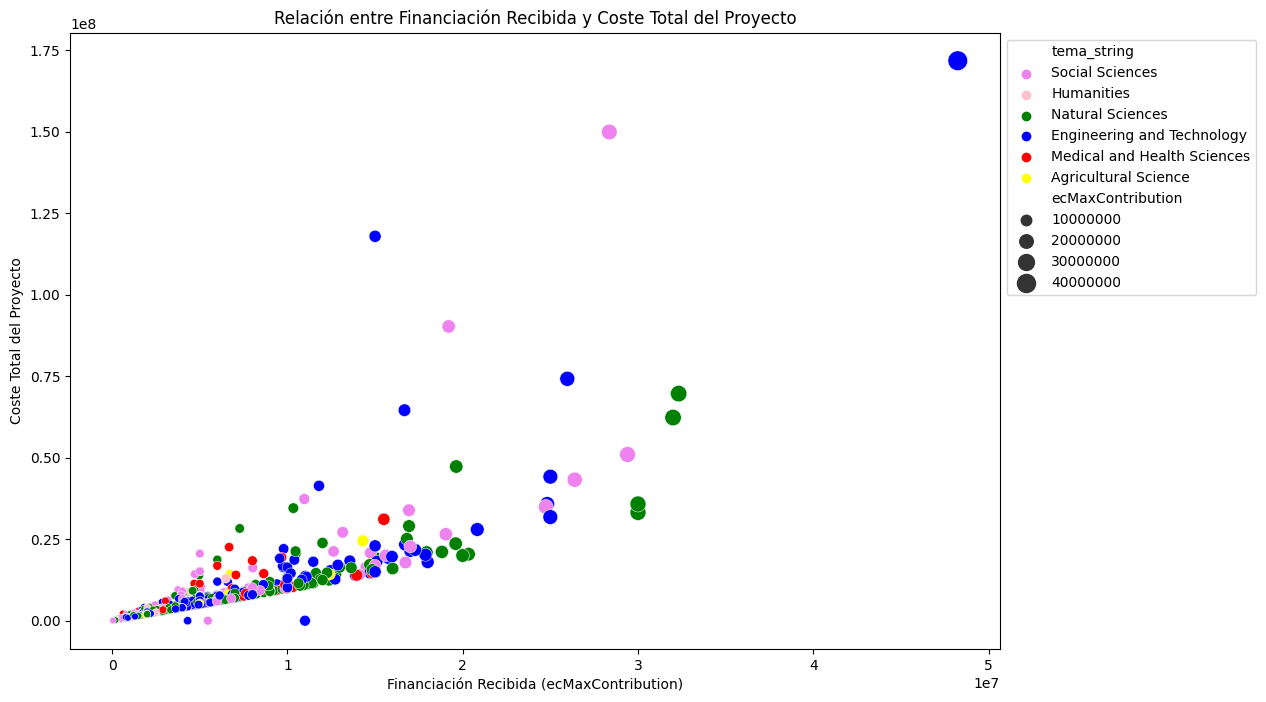

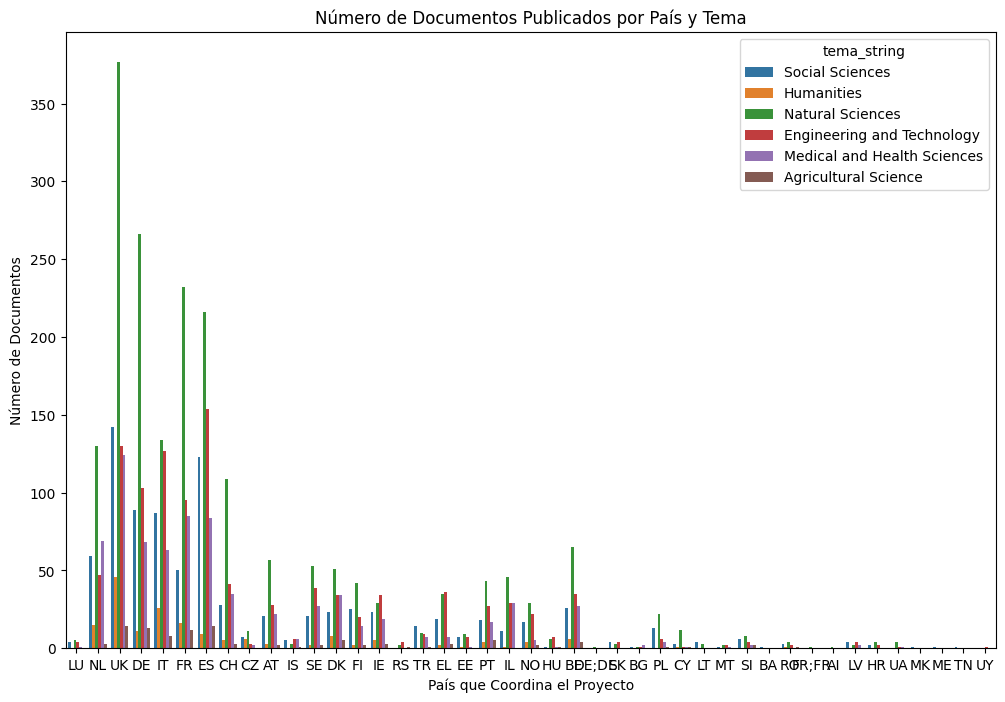

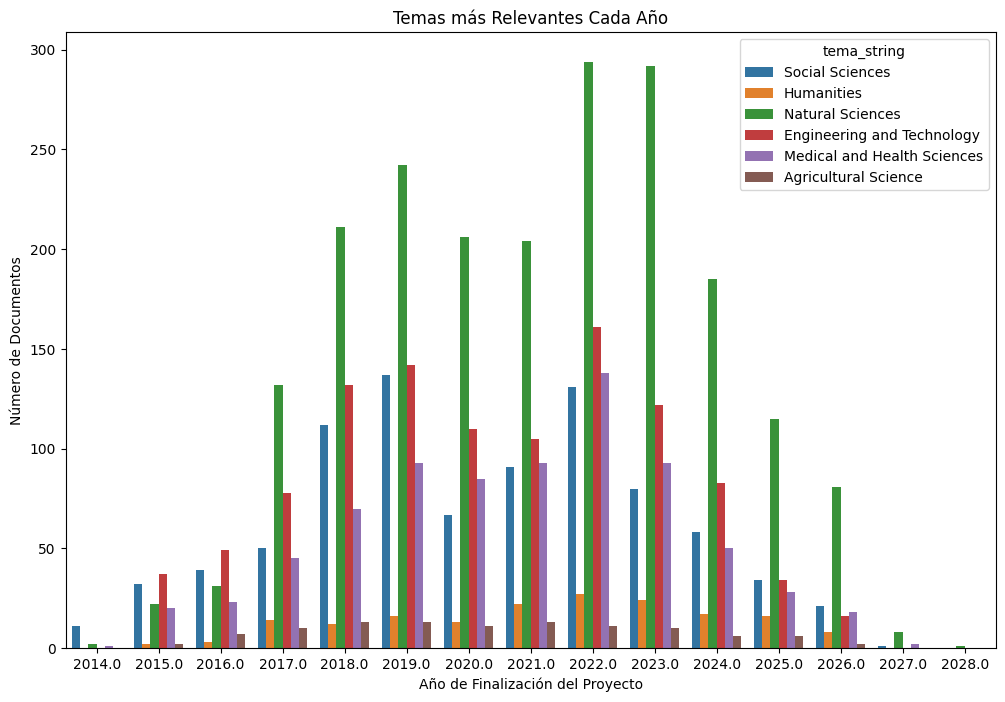

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

graph_df = preproc_df


# Fusionar graph_df con df_proyectos para añadir las columnas deseadas
graph_df = pd.merge(graph_df, data_df[['projectID', 'ecMaxContribution', 'totalCost', 'endDate' , 'coordinatorCountry']],
                    left_on='projectID', right_on='projectID', how='left')

print(graph_df.head())


# Definir un diccionario de mapeo
codigo_a_tema = {
    21: 'Medical and Health Sciences',
    23: 'Natural Sciences',
    25: 'Engineering and Technology',
    27: 'Agricultural Science',
    29: 'Social Sciences',
    31: 'Humanities'
}

# Aplicar el mapeo al DataFrame graph_df
graph_df['tema_string'] = graph_df['code'].map(codigo_a_tema)

# Seleccionar aleatoriamente 10000 muestras de graph_df
graph_df_subset = graph_df.sample(n=5000, random_state=42)
# Definir una lista de colores para cada tema
colores_temas = {
    'Medical and Health Sciences': 'red',
    'Natural Sciences': 'green',
    'Engineering and Technology': 'blue',
    'Agricultural Science': 'yellow',
    'Social Sciences': 'violet',
    'Humanities': 'pink'
}

# Asignar colores según el tema al DataFrame
graph_df_subset['color'] = graph_df_subset['tema_string'].map(colores_temas)

# Gráfico de dispersión para la relación entre financiación recibida y coste total del proyecto
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='ecMaxContribution', y='totalCost', hue='tema_string', size='ecMaxContribution', palette=colores_temas, sizes=(20, 200), data=graph_df_subset)
scatter_plot.legend(bbox_to_anchor=(1, 1), loc='upper left')  # Ajustar la leyenda
plt.title('Relación entre Financiación Recibida y Coste Total del Proyecto')
plt.xlabel('Financiación Recibida (ecMaxContribution)')
plt.ylabel('Coste Total del Proyecto')
plt.show()

# Gráfica 3: Número de documentos publicados por país y tema
plt.figure(figsize=(12, 8))
sns.countplot(x='coordinatorCountry', hue='tema_string', data=graph_df_subset)
plt.title('Número de Documentos Publicados por País y Tema')
plt.xlabel('País que Coordina el Proyecto')
plt.ylabel('Número de Documentos')
plt.show()

# Gráfica 4: Temas más relevantes cada año
plt.figure(figsize=(12, 8))
sns.countplot(x=graph_df_subset['endDate'].dt.year, hue='tema_string', data=graph_df_subset)
plt.title('Temas más Relevantes Cada Año')
plt.xlabel('Año de Finalización del Proyecto')
plt.ylabel('Número de Documentos')
plt.show()
